# Reposição 2 - 2020.1 

In [83]:
import sympy as sp
import numpy as np
from sympy import *
from utils import symdisp, symplot, round_expr

In [84]:
# Matricula 119210814
m =[1,4]
r1 = m[0]+1
r2 = m[1]+1 
display(r1,r2)

2

5

# Questão 1

Em regime estacionário o indutor funciona cmo curto circuitoe para este caso a tensão no indutor será a mesma no resistor $3R_2$.

In [85]:
iL0 = r1/(r1+r2); symdisp('i_L(0) = ',round(iL0,3),'A')
vL0 = 0; symdisp('v_L(0) = ', round(vL0,2),'V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transformação DELTA - Y:

In [86]:
Ra = (3*r2 *r1)/(r1+3*r2 +r2);symdisp('R_a = ',round(Ra,3),'Ω')
Rb = (r1*r2)/(r1+3*r2 +r2);symdisp('R_b = ',round(Rb,3),'Ω')
Rc = (r2*3*r2)/(r1+3*r2 +r2);symdisp('R_c = ',round(Rc,3),'Ω')
Rth = Rc + (Ra*(Rb+2*r1))/(Ra+Rb+ 2*r1); symdisp('R_{Th} = ',round(Rth,3),'Ω')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

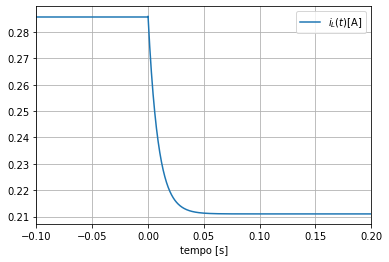

In [87]:
Req = (r2*2*r1)/(r2+ 2*r1);symdisp('R_{eq}=',round(Req,3),'Ω')

# Corrente de Curto circuito
icc = r1/(r1+Req); symdisp('i_{cc}=',round(icc*10**3,3),'mA')

#Tensão Vth
vth = Req*icc;symdisp('v_{Th}=',round(vth,3),'V')

i1 = (2*r1 / (r2+ 2*r1))*icc; symdisp('i_1 = ',round(i1*10**3,3),'mA')
t = sp.symbols('t')
L = 20*10**-3
#constante de tempo
τ = L/Req

iLt = (iL0-i1)*sp.exp(-t/τ) + i1; symdisp('i_L(t) = ',round_expr(iLt,3),'A')
iLt_plot = sp.Piecewise((iL0,t<0),(round_expr(iLt,3),t>=0))

intervalo = np.linspace(-0.1,0.2, 1000)
symplot(t,iLt_plot,intervalo,'$i_L(t)$[A]')


# Questão 2

In [88]:
ra = 20*r1;rb =40*r2; rc =10*r2
symdisp('[R_a,R_b,R_c]=',[ra ,rb, rc],'Ω')
vf =10;symdisp('v =',vf,'V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# a)

In [89]:
Req = ((ra+rb)*rc)/((ra+rb)+rc);symdisp('R_{eq} = ',round(Req,3),'Ω')
vs  = ((vf/(ra+rb))+0.25)*Req ; symdisp('V_s = ',round(vs,3),'V')
iL0 = vs/Req; symdisp('i_L(0^+) =',round(iL0*10**3,3),'mA')
vC0 = -(vf*rb)/(ra+rb);symdisp('v_C(0^+) = ',round(vC0,3),'V')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Itens: b) e c) RLC - Resposta ao degrau paralelo

Fator de Amortecimento


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frequência de Ressonância


<IPython.core.display.Math object>

<IPython.core.display.Math object>

RESPOSTA SUPERAMORTECIDA

Forma geral da solução:


<IPython.core.display.Math object>

Sistema de equações:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

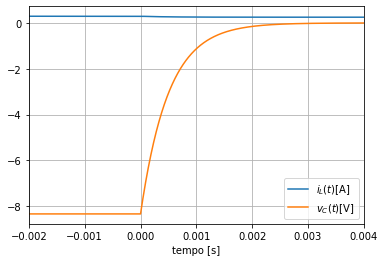

In [105]:
t0 = 0
R = ra
vo = vC0
i0 = iL0
c = 10*10**-6
L = 100*10**-3
Is = 0.25
#Fator de amortecimento
α = 1/(2*R*c);
print('Fator de Amortecimento')
symdisp('α = ',round(α,3),'\\frac{rad}{s}')
symdisp('α^2 = ',round(α**2,3),'\\frac{rad}{s}')

print('Frequência de Ressonância')
ω = 1/sp.sqrt(L*c)
symdisp('ω_o = ',round(ω,3),'\\frac{rad}{s}')
symdisp('ω_o^2 = ',round(ω**2,3),'\\frac{rad}{s}')


if α**2 > ω**2:
    print('RESPOSTA SUPERAMORTECIDA')############ SUPERAMORTECIDO ################ 
    s1 = -α + sp.sqrt(α**2 - ω**2)
    s2 = -α - sp.sqrt(α**2 - ω**2)
    A1, A2 = sp.symbols('A1 ,A2')
    # expressão geral da resposta superamortecida
    iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL,3), 'A')
    # define os sistema de equações com as condições iniciais
    eq1 = sp.Eq(   A1 +    A2 + Is, i0)             
    eq2 = sp.Eq(s1*A1 + s2*A2,        vo/L)  

    print('Sistema de equações:')
    symdisp('(I): ', round_expr(eq1, 2),' ')
    symdisp('(II): ', round_expr(eq2, 2),' ')

    # resolve o sistema
    soluc = sp.solve((eq1, eq2), dict=True)
    A1 = np.array([sol[A1] for sol in soluc])
    A2 = np.array([sol[A2] for sol in soluc])

    A1 = A1[0]
    A2 = A2[0]

    print('Solução do sistema:')
    symdisp('A_1 =', round(A1,6), ' A')
    symdisp('A_2 =', round(A2,6), ' A') 

    iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + Is
    symdisp('i_L(t) = ', round_expr(iL,3), 'A')

elif α**2 < ω**2:
    print('RESPOSTA SUBAMORTECIDA')############### SUBAMORTECIDO ###################
    ωd = sp.sqrt(ω**2 - α**2 )
    B1, B2 = sp.symbols('B1 ,B2')
    B1 = i0
    B2 = ((1/L)*(-R*i0 - vo)+(α*B1))/ωd
    iL = sp.exp(-α*t)*(B1*sp.cos(ωd*t) + B2*sp.sin(ωd*t))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

elif α**2 == ω**2:
    print('RESPOSTA CRITICAMENTE AMORTECIDA')############### CRITICAMENTE AMORTECIDO ################
    D1, D2 = sp.symbols('D1 ,D2')
    D2 = i0
    D1 = ((1/L)*(-R*i0 - vo)+(α*D2))/ωd
    iL = sp.exp(-α*t)*(D1*t + B2)
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

#tensão no capacitor 0<= t <= 1
vct = L*sp.diff(iL,t)
symdisp('v_C(t) = ', round_expr(vct.simplify(),3), 'V')

iL_plot  = sp.Piecewise((iL0,t<=0),(round_expr(iL.simplify(),3), t<1))
vct_plot = sp.Piecewise((vo,t<=0),(round_expr(vct.simplify(),3), t<1))

intervalo = np.linspace(-0.002,0.004, 1000)
symplot(t,[iL_plot,vct_plot],intervalo,['$i_L(t)$[A]','$v_C(t)$[V]'])

# d)

Fator de Amortecimento


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frequência de Ressonância


<IPython.core.display.Math object>

<IPython.core.display.Math object>

RESPOSTA CRITICAMENTE AMORTECIDA

Forma geral da solução:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

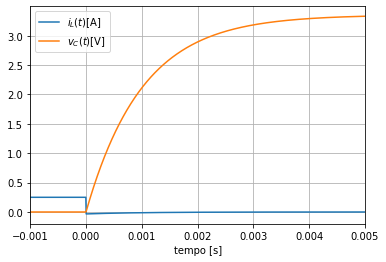

In [122]:
t0 = 1
R = rb
vo = 0
i0 = Is
#Fator de amortecimento
α = R/(2*L);
print('Fator de Amortecimento')
symdisp('α = ',round(α,3),'\\frac{rad}{s}')
symdisp('α^2 = ',round(α**2,3),'\\frac{rad}{s}')

print('Frequência de Ressonância')
ω = 1/sp.sqrt(L*c)
symdisp('ω_o = ',round(ω,3),'\\frac{rad}{s}')
symdisp('ω_o^2 = ',round(ω**2,3),'\\frac{rad}{s}')


if α**2 > ω**2:
    print('RESPOSTA SUPERAMORTECIDA')
    s1 = -α + sp.sqrt(α**2 - ω**2)
    s2 = -α - sp.sqrt(α**2 - ω**2)
    A1, A2 = sp.symbols('A1 ,A2')
    # expressão geral da resposta superamortecida
    iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL,3), 'A')
    # define os sistema de equações com as condições iniciais
    eq1 = sp.Eq(   A1 +    A2 + Is, i0)             
    eq2 = sp.Eq(s1*A1 + s2*A2,        vo/L)  

    print('Sistema de equações:')
    symdisp('(I): ', round_expr(eq1, 2),' ')
    symdisp('(II): ', round_expr(eq2, 2),' ')

    # resolve o sistema
    soluc = sp.solve((eq1, eq2), dict=True)
    A1 = np.array([sol[A1] for sol in soluc])
    A2 = np.array([sol[A2] for sol in soluc])

    A1 = A1[0]
    A2 = A2[0]

    print('Solução do sistema:')
    symdisp('A_1 =', round(A1,6), ' A')
    symdisp('A_2 =', round(A2,6), ' A') 

    iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + Is
    symdisp('i_L(t) = ', round_expr(iL,3), 'A')


elif α**2 < ω**2:
    print('RESPOSTA SUBAMORTECIDA')
    ωd = sp.sqrt(ω**2 - α**2 )
    B1, B2 = sp.symbols('B1 ,B2')
    B1 = i0
    B2 = ((1/L)*(-R*i0 - vo)+(α*B1))/ωd
    iL = sp.exp(-α*t)*(B1*sp.cos(ωd*t) + B2*sp.sin(ωd*t))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

elif α**2 == ω**2:
    print('RESPOSTA CRITICAMENTE AMORTECIDA')
    D1, D2 = sp.symbols('D1 ,D2')
    D2 = i0
    D1 = ((1/L)*(-R*i0 - vo)+(α*D2))/ωd
    iL = sp.exp(-α*t)*(D1*t + B2)
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

#tensão no capacitor 0<= t <= 1
vct = -(1/c)*sp.integrate(iL,(t,0,t))+vo
symdisp('v_c(t) = ', round_expr(vct.simplify(),3), 'V')

iL_plot  = sp.Piecewise((i0,t<0),(round_expr(iL.simplify(),3), t>=0))
vct_plot = sp.Piecewise((vo,t<0),(round_expr(vct.simplify(),3), t>=0))

intervalo = np.linspace(-0.001,0.005, 1000)
symplot(t,[iL_plot,vct_plot],intervalo,['$i_L(t)$[A]','$v_C(t)$[V]'])
